# HT8. Redes Neuronales Artificiales

## Miembros
- Francisco Javier Castillo Cerna 21562
- Fernanda Esquivel de León 21542
- Andrés Estuardo Montoya 21552

## Link al repositorio 
El repositorio puede ser visualizado [acá](https://github.com/FerEsq/DM-House-Saleprice-Predictor/tree/SVM)

## 1. Use los mismos conjuntos de entrenamiento y prueba que utilizó en las hojas anteriores.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv('data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [77]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [78]:
df["MSZoning"] = le.fit_transform(df["MSZoning"])
df["Street"] = le.fit_transform(df["Street"])
df["Alley"] = le.fit_transform(df["Alley"])
df["LotShape"] = le.fit_transform(df["LotShape"])
df["LandContour"] = le.fit_transform(df["LandContour"])
df["Utilities"] = le.fit_transform(df["Utilities"])
df["LotConfig"] = le.fit_transform(df["LotConfig"])
df["LandSlope"] = df["LandSlope"].map({
    "Gtl": 1,
    "Mod": 2,
    "Sev": 3
})
df["Neighborhood"] = le.fit_transform(df["Neighborhood"])
df["Condition1"] = le.fit_transform(df["Condition1"])
df["Condition2"] = le.fit_transform(df["Condition2"])
df["BldgType"] = le.fit_transform(df["BldgType"])
df["HouseStyle"] = le.fit_transform(df["HouseStyle"])
df["RoofStyle"] = le.fit_transform(df["RoofStyle"])
df["RoofMatl"] = le.fit_transform(df["RoofMatl"])
df["Exterior1st"] = le.fit_transform(df["Exterior1st"])
df["Exterior2nd"] = le.fit_transform(df["Exterior2nd"])
df["MasVnrType"] = le.fit_transform(df["MasVnrType"])

condition_map = {
    "Ex": 5,
    "Gd": 4,
    "TA": 3,
    "Fa": 2,
    "Po": 1,
    "NA": 0,
}
df["ExterQual"] = df["ExterQual"].map(condition_map)
df["ExterCond"] = df["ExterCond"].map(condition_map)
df["Foundation"] = le.fit_transform(df["Foundation"])
df["BsmtQual"] = df["BsmtQual"].map(condition_map)
df["BsmtCond"] = df["BsmtCond"].map(condition_map)
df["BsmtExposure"] = df["BsmtExposure"].map({
    "Gd": 4,
    "Av": 3,
    "Mn": 2,
    "No": 1,
    "NA": 0
})
df["BsmtFinType1"] = df["BsmtFinType1"].map({
    "GLQ": 6,
    "ALQ": 5,
    "BLQ": 4,
    "Rec": 3,
    "LwQ": 2,
    "Unf": 1,
    "NA": 0
})
df["BsmtFinType2"] = df["BsmtFinType2"].map({
    "GLQ": 6,
    "ALQ": 5,
    "BLQ": 4,
    "Rec": 3,
    "LwQ": 2,
    "Unf": 1,
    "NA": 0
})
df["Heating"] = le.fit_transform(df["Heating"])
df["HeatingQC"] = df["HeatingQC"].map(condition_map)
df["CentralAir"] = le.fit_transform(df["CentralAir"])
df["Electrical"] = df["Electrical"].map({
    "SBrkr": 5,
    "FuseA": 4,
    "FuseF": 3,
    "FuseP": 2,
    "Mix": 1,
    "NA": 0
})
df["KitchenQual"] = df["KitchenQual"].map(condition_map)
df["Functional"] = le.fit_transform(df["Functional"])
df["FireplaceQu"] = df["FireplaceQu"].map(condition_map)
df["GarageType"] = le.fit_transform(df["GarageType"])
df["GarageFinish"] = df["GarageFinish"].map({
    "Fin": 3,
    "RFn": 2,
    "Unf": 1,
    "NA": 0
})
df["GarageQual"] = df["GarageQual"].map(condition_map)
df["GarageCond"] = df["GarageCond"].map(condition_map)
df["PavedDrive"] = df["PavedDrive"].map({
    "Y": 3,
    "P": 2,
    "N": 1,
    "NA": 0
})
df["PoolQC"] = df["PoolQC"].map(condition_map)
df["Fence"] = df["Fence"].map({
    "GdPrv": 4,
    "MnPrv": 3,
    "GdWo": 2,
    "MnWw": 1,
    "NA": 0
})
df["MiscFeature"] = le.fit_transform(df["MiscFeature"])
df["SaleType"] = le.fit_transform(df["SaleType"])
df["SaleCondition"] = le.fit_transform(df["SaleCondition"])

for col in df.columns:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(0)

## 2. Seleccione como variable respuesta la que creó con las categorías del precio de la casa.

In [79]:
price_class_df = df.copy()

In [80]:
lower_limit = np.percentile(price_class_df['SalePrice'], 33)
upper_limit = np.percentile(price_class_df['SalePrice'], 66)

def classify_house(price):
    if price < lower_limit:
        return 'Economical'
    elif price < upper_limit:
        return 'Intermediate'
    else:
        return 'Expensive'

price_class_df['Classification'] = price_class_df['SalePrice'].apply(classify_house)

print(price_class_df[['SalePrice', 'Classification']].head())

   SalePrice Classification
0     208500      Expensive
1     181500   Intermediate
2     223500      Expensive
3     140000   Intermediate
4     250000      Expensive


## 3. Genere dos modelos de redes neuronales que sean capaz de clasificar usando la variable respuesta que categoriza las casas en baratas, medias y caras.

In [81]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [82]:
X = price_class_df.drop(['SalePrice', 'Classification'], axis=1)
y = price_class_df['Classification']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
model_adam = MLPClassifier(
    solver='adam',
    hidden_layer_sizes=(100, 100), 
    max_iter=1000, 
    random_state=42
)

In [85]:
model_adam.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

In [86]:
model_sgd = MLPClassifier(
    solver='sgd',
    hidden_layer_sizes=(100, 100), 
    max_iter=1000, 
    random_state=42
)

In [87]:
model_sgd.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42,
              solver='sgd')

## 4. Use los modelos para predecir el valor de la variable respuesta

In [88]:
y_pred_adam = model_adam.predict(X_test)

In [89]:
y_pred_sgd = model_sgd.predict(X_test)

## 5. Haga las matrices de confusión respectivas.

In [90]:
from sklearn.metrics import confusion_matrix

In [91]:
confusion_matrix_adam = confusion_matrix(y_test, y_pred_adam)
confusion_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)

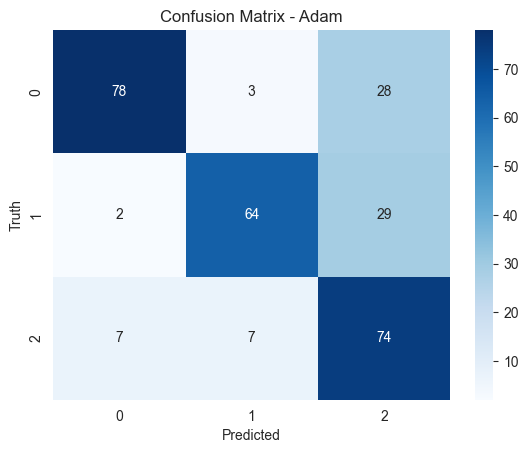

In [92]:
sns.heatmap(confusion_matrix_adam, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - Adam')
plt.show()

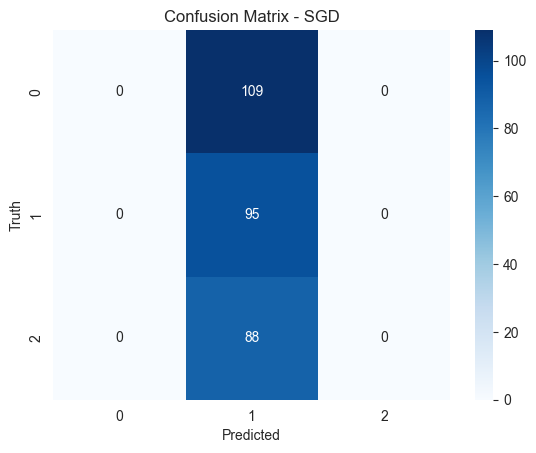

In [93]:
sns.heatmap(confusion_matrix_sgd, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - SGD')
plt.show()

## 6. Compare los resultados obtenidos con los diferentes modelos de clasificación usando redes neuronales en cuanto a efectividad, tiempo de procesamiento y equivocaciones (donde el algoritmo se equivocó más, donde se equivocó menos y la importancia que tienen los errores)

*Explicación *

## 7. Analice si no hay sobreajuste en los modelos.

In [94]:
from sklearn.metrics import classification_report

In [95]:
print("Modelo Adam")
print(classification_report(y_test, y_pred_adam))

Modelo Adam
              precision    recall  f1-score   support

  Economical       0.90      0.72      0.80       109
   Expensive       0.86      0.67      0.76        95
Intermediate       0.56      0.84      0.68        88

    accuracy                           0.74       292
   macro avg       0.78      0.74      0.74       292
weighted avg       0.79      0.74      0.75       292



In [96]:
import warnings
warnings.filterwarnings('ignore')

print("Modelo SGD")
print(classification_report(y_test, y_pred_sgd))

Modelo SGD
              precision    recall  f1-score   support

  Economical       0.00      0.00      0.00       109
   Expensive       0.33      1.00      0.49        95
Intermediate       0.00      0.00      0.00        88

    accuracy                           0.33       292
   macro avg       0.11      0.33      0.16       292
weighted avg       0.11      0.33      0.16       292



No hay _overfitting_ y el desempeño del modelo que implementa SGD deja mucho que desear EXPANDIR RESPUESTAS

## 8. Para el modelo elegido de clasificación (Adam) tunee los parámetros y discuta si puede mejorar todavía el modelo sin llegar a sobre ajustarlo

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
param_grid = {
    'hidden_layer_sizes': [(100, 100), (100, 100, 100), (100, 100, 100, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['adam'],
    'max_iter': [1000]
}

In [99]:
grid_search = GridSearchCV(MLPClassifier(random_state=42), param_grid, cv=5)

In [100]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(100, 100), (100, 100, 100),
                                                (100, 100, 100, 100)],
                         'max_iter': [1000], 'solver': ['adam']})

In [101]:
grid_search.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (100, 100),
 'max_iter': 1000,
 'solver': 'adam'}

In [102]:
y_pred_adam_tuned = grid_search.predict(X_test)

In [103]:
confusion_matrix_adam_tuned = confusion_matrix(y_test, y_pred_adam_tuned)

<Axes: >

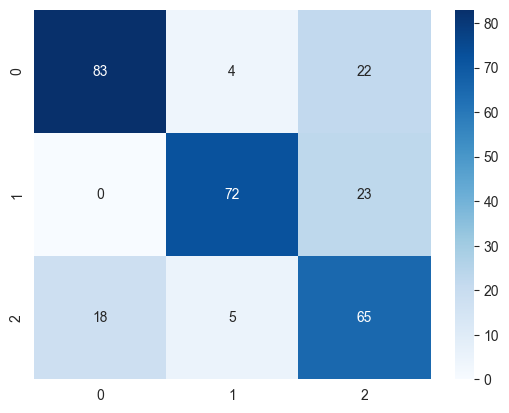

In [104]:
sns.heatmap(confusion_matrix_adam_tuned, annot=True, fmt='d', cmap='Blues')

In [105]:
print("Modelo Adam")
print(classification_report(y_test, y_pred_adam_tuned))

Modelo Adam
              precision    recall  f1-score   support

  Economical       0.82      0.76      0.79       109
   Expensive       0.89      0.76      0.82        95
Intermediate       0.59      0.74      0.66        88

    accuracy                           0.75       292
   macro avg       0.77      0.75      0.76       292
weighted avg       0.77      0.75      0.76       292



## 9. Seleccione ahora el SalesPrice como variable respuesta.

In [106]:
price_df = df.copy()

In [107]:
X = price_class_df.drop(['SalePrice', 'Classification'], axis=1)
y = price_df['SalePrice']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 10. Genere dos modelos de regresión con redes neuronales con diferentes topologías y funciones de activación para predecir el precio de las casas.   

In [109]:
from sklearn.neural_network import MLPRegressor

In [111]:
model_relu = MLPRegressor(
    hidden_layer_sizes=(100, 100), 
    activation='relu',
    max_iter=1000, 
    random_state=42
)

In [112]:
model_relu.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

In [113]:
model_tanh = MLPRegressor(
    hidden_layer_sizes=(100, 100), 
    activation='tanh',
    max_iter=1000, 
    random_state=42
)

In [114]:
model_tanh.fit(X_train, y_train)

MLPRegressor(activation='tanh', hidden_layer_sizes=(100, 100), max_iter=1000,
             random_state=42)

In [115]:
y_pred_relu = model_relu.predict(X_test)

In [116]:
y_pred_tanh = model_tanh.predict(X_test)

### 10.1. Haga una comparación de los resultados obtenidos

In [117]:
from sklearn.metrics import mean_squared_error

In [118]:
mse_relu = mean_squared_error(y_test, y_pred_relu)
mse_tanh = mean_squared_error(y_test, y_pred_tanh)

In [119]:
print(f"MSE Relu: {mse_relu}")
print(f"MSE Tanh: {mse_tanh}")

MSE Relu: 1433829315.2538965
MSE Tanh: 39432842792.256355


## 11. Compare los dos modelos de regresión y determine cuál funcionó mejor para predecir el precio de las casas.

## 12. Analice si no hay sobreajuste en los modelos. Use para esto la curva de aprendizaje.

In [121]:
from sklearn.model_selection import learning_curve

In [122]:
train_sizes, train_scores, test_scores = learning_curve(
    MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', max_iter=1000, random_state=42),
    X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

In [123]:
train_scores_mean = np.mean(train_scores, axis=1)

In [124]:
train_scores_std = np.std(train_scores, axis=1)

In [125]:
test_scores_mean = np.mean(test_scores, axis=1)

In [126]:
test_scores_std = np.std(test_scores, axis=1)

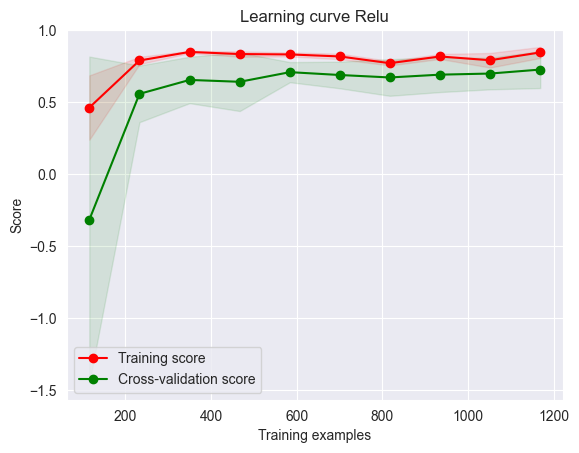

In [128]:
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning curve Relu')
plt.legend(loc='best')
plt.show()

In [129]:
train_sizes, train_scores, test_scores = learning_curve(
    MLPRegressor(hidden_layer_sizes=(100, 100), activation='tanh', max_iter=1000, random_state=42),
    X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

In [130]:
train_scores_mean = np.mean(train_scores, axis=1)

In [131]:
train_scores_std = np.std(train_scores, axis=1)

In [132]:
test_scores_mean = np.mean(test_scores, axis=1)

In [133]:
test_scores_std = np.std(test_scores, axis=1)

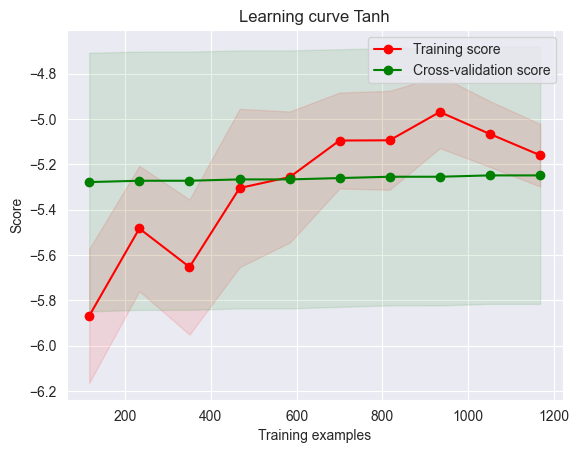

In [134]:
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning curve Tanh')
plt.legend(loc='best')
plt.show()